<hr style="height:5px;border-width:0;color:MediumAquamarine;background-color:MediumAquamarine">

# Python Notebook for Stock Market Analysis

- [API Reference]()
- [Reference]()

<hr style="height:5px;border-width:0;color:MediumAquamarine;background-color:MediumAquamarine">

### Table of Contents <a class="anchor" id="PSMA_toc"></a>

* [Table of Contents](#PSMA_toc)
    * [1. Abstract](#PSMA_page_1)
    * [2. Imported Libraries](#PSMA_page_2)
    * [3. Import the Dataset](#PSMA_page_3)
    * [4. Setting Notebook Options](#PSMA_page_4)
    * [5. Looking at the Data](#PSMA_page_5)
    * [6. Checking the Column Names](#PSMA_page_6)
    * [7. Cleaning the Column Names](#PSMA_page_7)
    * [8. Creating a new Cleaned Dataset](#PSMA_page_8)
    * [9. Counting Columns](#PSMA_page_9)
    * [10. Get Info about the Dataset](#PSMA_page_10)
    * [11. Get Descriptive Statistics about the Dataset](#PSMA_page_11)
    * [12. Counting Rows and Removing any NANs](#PSMA_page_12)
    * [13. Correlation Analysis](#PSMA_page_13)
    * [14. Principal Component Analysis (PCA)](#PSMA_page_14)
    * [15. Group Comparison](#PSMA_page_15)
    * [16. Fisher's Discriminant Analysis and Support Vector Machines (SVM)](#PSMA_page_16)
    * [17. Groupby Function](#PSMA_page_17)

<hr style="height:5px;border-width:0;color:MediumAquamarine;background-color:MediumAquamarine">

# Page 1 - Abstract <a class="anchor" id="PSMA_page_1"></a>

[Back to Top](#PSMA_toc)

<hr style="height:5px;border-width:0;color:MediumAquamarine;background-color:MediumAquamarine">

In [110]:
print("jorge")
df = pd.read_clipboard()
df.to_csv("path.fileName.csv")
df.head()
CD = pd.read_csv ("path.fileName.csv")
CD.head()

jorge


,Unnamed: 0,Date,Open,High,Low,Close*,Adj Close**,Volume
0,0,"Jun 14, 2023","1,295.86","1,299.41","1,275.46","1,292.23","1,292.23","508,152,400"
1,1,"Jun 13, 2023","1,292.28","1,294.55","1,280.39","1,293.65","1,293.65","494,163,200"
2,2,"Jun 12, 2023","1,267.53","1,282.99","1,263.15","1,280.79","1,280.79","535,114,300"
3,3,"Jun 09, 2023","1,267.75","1,276.09","1,256.37","1,258.94","1,258.94","499,413,600"
4,4,"Jun 08, 2023","1,237.53","1,256.20","1,235.85","1,253.45","1,253.45","459,777,400"


<hr style="height:5px;border-width:0;color:MediumAquamarine;background-color:MediumAquamarine">

# Page 2 - Imported Libraries<a class="anchor" id="PSMA_page_2"></a>

[Back to Top](#PSMA_toc)

<hr style="height:5px;border-width:0;color:MediumAquamarine;background-color:MediumAquamarine">


In [86]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy import stats 
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
import matplotlib.pyplot as plt
pd.set_option('display.max_columns',100) 
%matplotlib inline
import seaborn as sns
sns.set_style('darkgrid')
import  statsmodels.api as sm
import statsmodels.stats.api as sms
from scipy.stats import boxcox

<hr style="height:5px;border-width:0;color:MediumAquamarine;background-color:MediumAquamarine">

# Page 3 - Import The Dataset<a class="anchor" id="PSMA_page_3"></a>

[Back to Top](#PSMA_toc)

<hr style="height:5px;border-width:0;color:MediumAquamarine;background-color:MediumAquamarine">


In [111]:
Financials = pd.read_csv("C:/Users/dizzy/Downloads/VFH.csv")

In [112]:
Healthcare = pd.read_csv("C:/Users/dizzy/Downloads/GEHC.csv")

In [113]:
IT = pd.read_csv("C:/Users/dizzy/Downloads/IT.csv")

In [114]:
CD = pd.read_csv ("path.fileName.csv")

<hr style="height:5px;border-width:0;color:MediumAquamarine;background-color:MediumAquamarine">

# Page 4 - Setting Notebook Options<a class="anchor" id="PSMA_page_4"></a>

[Back to Top](#PSMA_toc)

<hr style="height:5px;border-width:0;color:MediumAquamarine;background-color:MediumAquamarine">


<hr style="height:5px;border-width:0;color:MediumAquamarine;background-color:MediumAquamarine">

# Page 5 - Looking at the data<a class="anchor" id="PSMA_page_4"></a>

[Back to Top](#PSMA_toc)

<hr style="height:5px;border-width:0;color:MediumAquamarine;background-color:MediumAquamarine">


In [115]:
Financials.head()

,Date,Open,High,Low,Close,Adj Close,Volume
0,2022-06-02,85.489998,86.900002,85.019997,86.839996,84.711449,1168000
1,2022-06-03,86.019997,86.300003,85.500000,85.610001,83.511597,583600
2,2022-06-06,86.389999,87.120003,85.870003,85.910004,83.804253,365300
3,2022-06-07,85.300003,86.620003,85.209999,86.570000,84.448067,325300
4,2022-06-08,85.820000,86.120003,84.709999,85.059998,82.975090,531400


In [116]:
Healthcare.head()

,Date,Open,High,Low,Close,Adj Close,Volume
0,2022-12-15,63.0,63.000000,60.000000,60.000000,59.977310,1318200
1,2022-12-16,60.0,60.000000,55.000000,56.740002,56.718548,2307500
2,2022-12-19,53.0,58.990002,53.000000,56.500000,56.478634,117200
3,2022-12-20,58.0,58.000000,56.759998,57.209999,57.188366,22200
4,2022-12-21,59.0,66.279999,55.500000,56.959999,56.938461,290700


In [117]:
IT.head()

,Date,Open,High,Low,Close,Adj Close,Volume
0,2022-06-02,261.970001,268.570007,260.369995,268.540009,268.540009,490600
1,2022-06-03,264.570007,267.510010,261.000000,266.790009,266.790009,500000
2,2022-06-06,269.000000,271.040009,265.500000,267.100006,267.100006,338000
3,2022-06-07,264.459991,269.010010,262.980011,267.320007,267.320007,358700
4,2022-06-08,265.059998,268.540009,260.690002,261.299988,261.299988,310300


In [118]:
CD.head()

,Unnamed: 0,Date,Open,High,Low,Close*,Adj Close**,Volume
0,0,"Jun 14, 2023","1,295.86","1,299.41","1,275.46","1,292.23","1,292.23","508,152,400"
1,1,"Jun 13, 2023","1,292.28","1,294.55","1,280.39","1,293.65","1,293.65","494,163,200"
2,2,"Jun 12, 2023","1,267.53","1,282.99","1,263.15","1,280.79","1,280.79","535,114,300"
3,3,"Jun 09, 2023","1,267.75","1,276.09","1,256.37","1,258.94","1,258.94","499,413,600"
4,4,"Jun 08, 2023","1,237.53","1,256.20","1,235.85","1,253.45","1,253.45","459,777,400"


 <hr style="height:5px;border-width:0;color:MediumAquamarine;background-color:MediumAquamarine">

# Page 6 Checking the columns<a class="anchor" id="PSMA_page_6"></a>

[Back to Top](#PSMA_toc)

<hr style="height:5px;border-width:0;color:MediumAquamarine;background-color:MediumAquamarine">


In [119]:
Financials['Close']

0      86.839996
1      85.610001
2      85.910004
3      86.570000
4      85.059998
         ...    
246    76.629997
247    77.230003
248    77.489998
249    76.440002
250    77.389999
Name: Close, Length: 251, dtype: float64

In [120]:
Healthcare['Close']

0      60.000000
1      56.740002
2      56.500000
3      57.209999
4      56.959999
         ...    
110    79.860001
111    78.430000
112    77.959999
113    79.510002
114    79.830002
Name: Close, Length: 115, dtype: float64

In [121]:
IT['Close']

0      268.540009
1      266.790009
2      267.100006
3      267.320007
4      261.299988
          ...    
246    338.239990
247    343.260010
248    342.510010
249    342.859985
250    340.239990
Name: Close, Length: 251, dtype: float64

In [122]:
CD['Close*']

0       1,292.23
1       1,293.65
2       1,280.79
3       1,258.94
4       1,253.45
          ...   
1253      888.02
1254      894.32
1255      890.09
1256      891.39
1257      893.11
Name: Close*, Length: 1258, dtype: object

In [123]:
Financials.describe()

,Open,High,Low,Close,Adj Close,Volume
count,251.000000,251.000000,251.000000,251.000000,251.000000,2.510000e+02
mean,81.720558,82.411594,81.028287,81.740837,80.845199,5.729394e+05
std,4.346021,4.326270,4.440124,4.407611,4.354516,4.806476e+05
min,73.330002,74.949997,72.959999,74.440002,73.466286,1.352000e+05
25%,77.774997,78.459999,76.935001,77.700001,77.134499,3.080000e+05
50%,81.669998,82.269997,80.540001,81.459999,80.410454,4.199000e+05
75%,85.834999,86.604999,84.989998,85.590000,84.524471,6.530500e+05
max,90.410004,90.870003,89.940002,90.639999,90.115753,3.522500e+06


In [124]:
Healthcare.describe()

,Open,High,Low,Close,Adj Close,Volume
count,115.000000,115.000000,115.000000,115.000000,115.000000,1.150000e+02
mean,73.027000,74.330748,72.088356,73.274261,73.248619,2.572238e+06
std,8.003036,7.612671,8.275035,8.079872,8.078185,3.300026e+06
min,53.000000,58.000000,53.000000,56.000000,55.978825,2.220000e+04
25%,68.515000,70.210003,67.915001,69.474998,69.448727,1.397650e+06
50%,75.489998,76.680000,74.870003,75.900002,75.871300,1.879100e+06
75%,79.154999,80.149997,77.954998,79.379997,79.349983,2.695750e+06
max,86.599998,87.830002,86.180000,87.790001,87.756805,3.333850e+07


In [125]:
IT.describe()

,Open,High,Low,Close,Adj Close,Volume
count,251.000000,251.000000,251.000000,251.000000,251.000000,2.510000e+02
mean,306.218048,310.050917,302.734064,306.601315,306.601315,4.732438e+05
std,32.705597,32.837197,32.647102,32.697383,32.697383,2.111433e+05
min,225.029999,229.529999,221.389999,224.070007,224.070007,1.653000e+05
25%,290.899993,294.660004,286.929993,289.815002,289.815002,3.508500e+05
50%,311.540009,314.989990,307.429993,312.109985,312.109985,4.190000e+05
75%,333.650009,337.490005,331.580002,334.029999,334.029999,5.245000e+05
max,358.250000,358.250000,350.619995,356.269989,356.269989,1.848000e+06


In [126]:
CD.describe()

,Unnamed: 0
count,1258.000000
mean,628.500000
std,363.297628
min,0.000000
25%,314.250000
50%,628.500000
75%,942.750000
max,1257.000000


 <hr style="height:5px;border-width:0;color:MediumAquamarine;background-color:MediumAquamarine">

# Page 7 Cleaning the columns<a class="anchor" id="PSMA_page_7"></a>

[Back to Top](#PSMA_toc)

<hr style="height:5px;border-width:0;color:MediumAquamarine;background-color:MediumAquamarine">

Financials['Date1'] = pd.to_datetime(Financials.Date)
Healthcare['Date1'] = pd.to_datetime(Healthcare.Date)
IT['Date1'] = pd.to_datetime(IT.Date)
CD['Date1'] = pd.to_datetime(CD.Date)

In [ ]:
# Page 8 Creating a new clean dataset

In [127]:
Financials

,Date,Open,High,Low,Close,Adj Close,Volume
0,2022-06-02,85.489998,86.900002,85.019997,86.839996,84.711449,1168000
1,2022-06-03,86.019997,86.300003,85.500000,85.610001,83.511597,583600
2,2022-06-06,86.389999,87.120003,85.870003,85.910004,83.804253,365300
3,2022-06-07,85.300003,86.620003,85.209999,86.570000,84.448067,325300
4,2022-06-08,85.820000,86.120003,84.709999,85.059998,82.975090,531400
...,...,...,...,...,...,...,...
246,2023-05-25,76.559998,76.870003,76.099998,76.629997,76.629997,333100
247,2023-05-26,76.769997,77.419998,76.589996,77.230003,77.230003,224500
248,2023-05-30,77.510002,77.660004,76.900002,77.489998,77.489998,300700
249,2023-05-31,77.139999,77.139999,75.970001,76.440002,76.440002,295700


In [128]:
Healthcare

,Date,Open,High,Low,Close,Adj Close,Volume
0,2022-12-15,63.000000,63.000000,60.000000,60.000000,59.977310,1318200
1,2022-12-16,60.000000,60.000000,55.000000,56.740002,56.718548,2307500
2,2022-12-19,53.000000,58.990002,53.000000,56.500000,56.478634,117200
3,2022-12-20,58.000000,58.000000,56.759998,57.209999,57.188366,22200
4,2022-12-21,59.000000,66.279999,55.500000,56.959999,56.938461,290700
...,...,...,...,...,...,...,...
110,2023-05-25,76.529999,80.059998,75.610001,79.860001,79.860001,3127800
111,2023-05-26,79.769997,80.199997,78.370003,78.430000,78.430000,2243100
112,2023-05-30,78.250000,79.050003,77.410004,77.959999,77.959999,1775800
113,2023-05-31,78.540001,79.730003,77.742996,79.510002,79.510002,4501500


In [129]:
IT

,Date,Open,High,Low,Close,Adj Close,Volume
0,2022-06-02,261.970001,268.570007,260.369995,268.540009,268.540009,490600
1,2022-06-03,264.570007,267.510010,261.000000,266.790009,266.790009,500000
2,2022-06-06,269.000000,271.040009,265.500000,267.100006,267.100006,338000
3,2022-06-07,264.459991,269.010010,262.980011,267.320007,267.320007,358700
4,2022-06-08,265.059998,268.540009,260.690002,261.299988,261.299988,310300
...,...,...,...,...,...,...,...
246,2023-05-25,332.410004,340.989990,329.570007,338.239990,338.239990,757500
247,2023-05-26,338.510010,346.450012,338.510010,343.260010,343.260010,513700
248,2023-05-30,344.980011,349.100006,340.959991,342.510010,342.510010,540800
249,2023-05-31,341.660004,345.679993,340.850006,342.859985,342.859985,1314500


In [130]:
CD1=CD.drop(["Unnamed: 0"],axis=1)

In [131]:
CD1

,Date,Open,High,Low,Close*,Adj Close**,Volume
0,"Jun 14, 2023","1,295.86","1,299.41","1,275.46","1,292.23","1,292.23","508,152,400"
1,"Jun 13, 2023","1,292.28","1,294.55","1,280.39","1,293.65","1,293.65","494,163,200"
2,"Jun 12, 2023","1,267.53","1,282.99","1,263.15","1,280.79","1,280.79","535,114,300"
3,"Jun 09, 2023","1,267.75","1,276.09","1,256.37","1,258.94","1,258.94","499,413,600"
4,"Jun 08, 2023","1,237.53","1,256.20","1,235.85","1,253.45","1,253.45","459,777,400"
...,...,...,...,...,...,...,...
1253,"Jun 21, 2018",895.70,896.44,886.67,888.02,888.02,-
1254,"Jun 20, 2018",895.18,897.11,891.43,894.32,894.32,-
1255,"Jun 19, 2018",884.54,890.22,881.92,890.09,890.09,-
1256,"Jun 18, 2018",886.72,893.41,885.60,891.39,891.39,-


In [132]:
CD1['Date1'] = pd.to_datetime(CD1.Date)

In [133]:
CD1.head()

,Date,Open,High,Low,Close*,Adj Close**,Volume,Date1
0,"Jun 14, 2023","1,295.86","1,299.41","1,275.46","1,292.23","1,292.23","508,152,400",2023-06-14
1,"Jun 13, 2023","1,292.28","1,294.55","1,280.39","1,293.65","1,293.65","494,163,200",2023-06-13
2,"Jun 12, 2023","1,267.53","1,282.99","1,263.15","1,280.79","1,280.79","535,114,300",2023-06-12
3,"Jun 09, 2023","1,267.75","1,276.09","1,256.37","1,258.94","1,258.94","499,413,600",2023-06-09
4,"Jun 08, 2023","1,237.53","1,256.20","1,235.85","1,253.45","1,253.45","459,777,400",2023-06-08


<hr style="height:5px;border-width:0;color:MediumAquamarine;background-color:MediumAquamarine">

# Page 8 Visualiszation<a class="anchor" id="PSMA_page_6"></a>

[Back to Top](#PSMA_toc)

<hr style="height:5px;border-width:0;color:MediumAquamarine;background-color:MediumAquamarine">

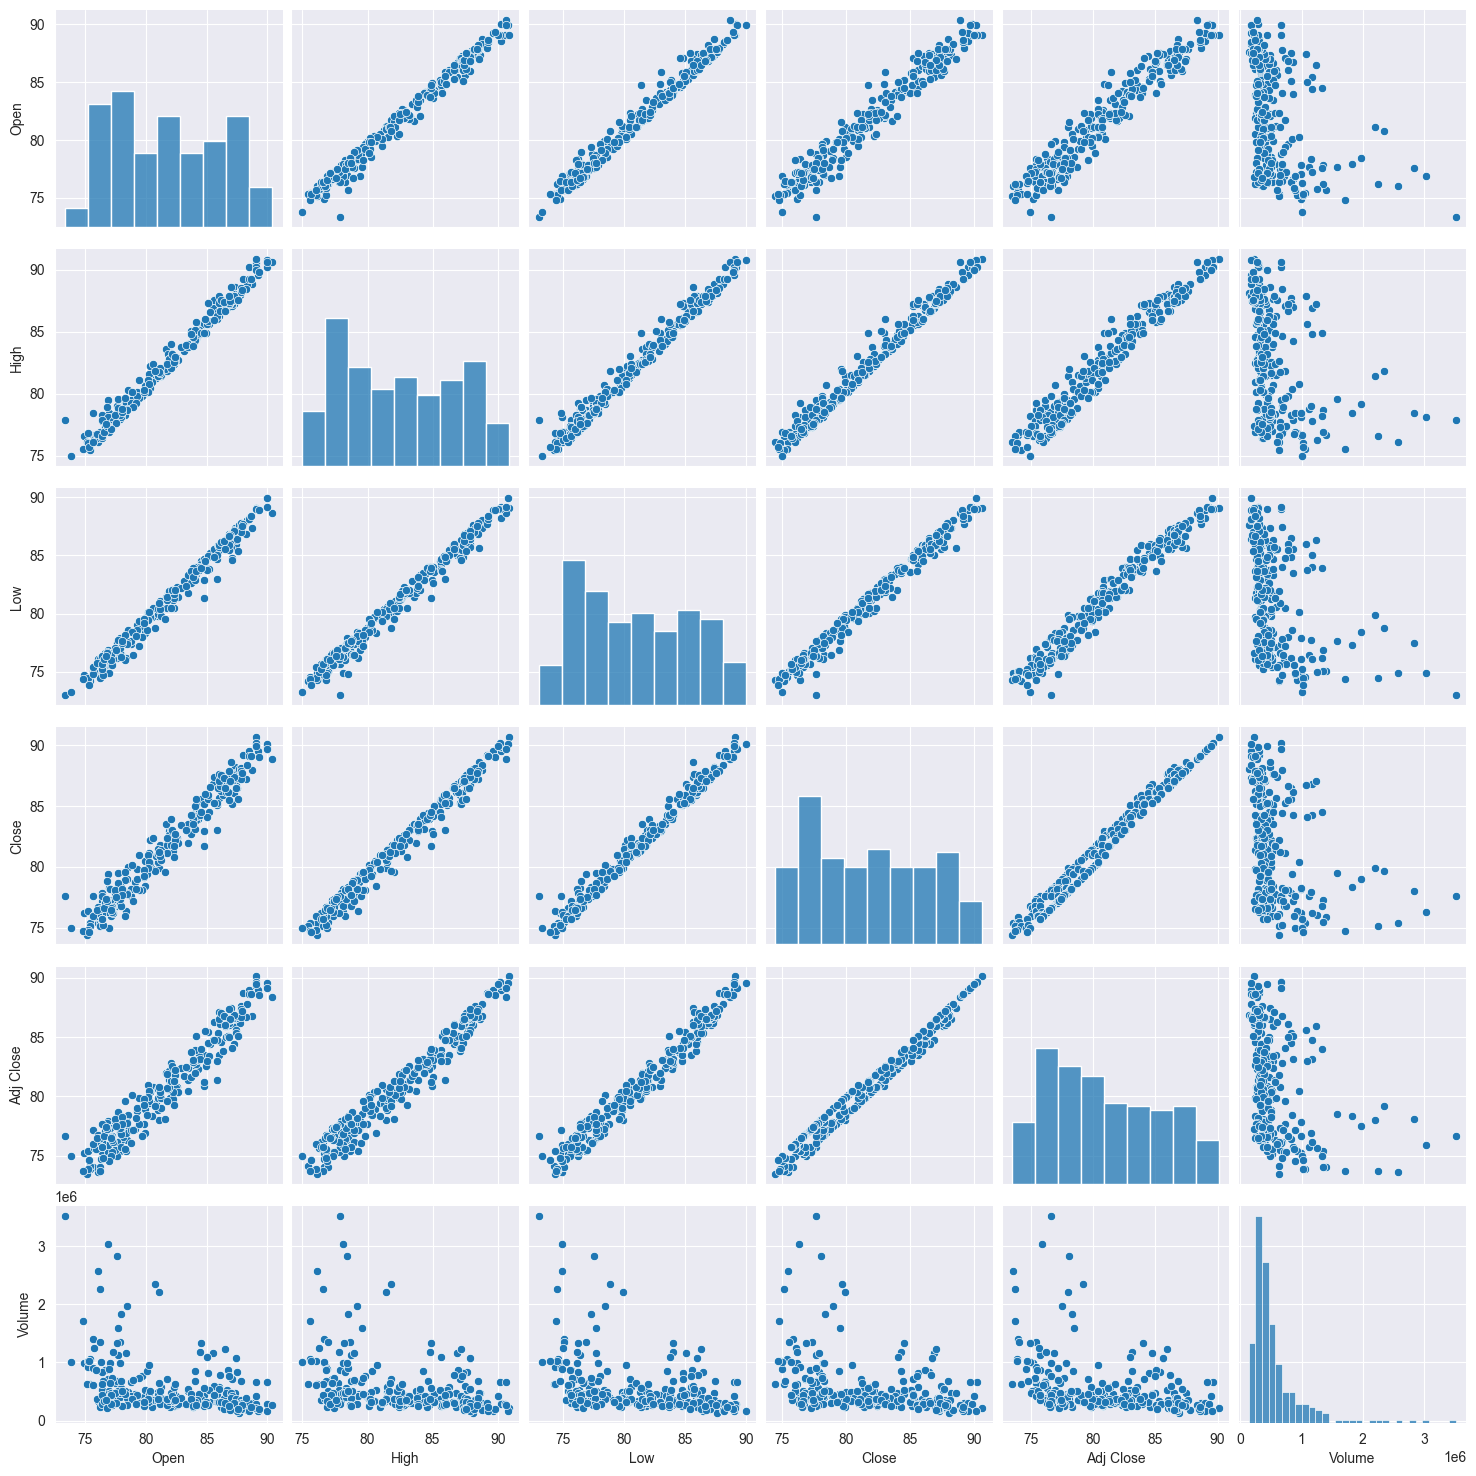

In [134]:
sns.pairplot(Financials) #Financials

In [135]:
num_bins = 20

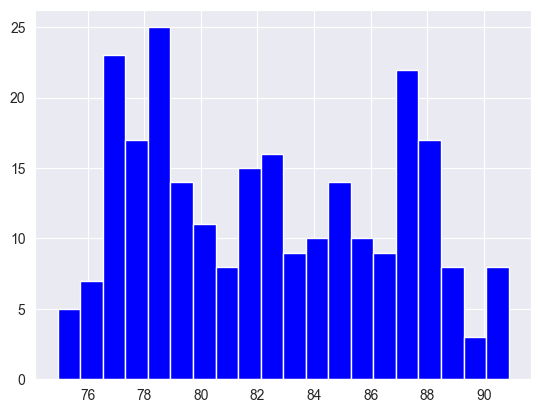

In [136]:
n, bins, patches = plt.hist(Financials['High'], num_bins, facecolor='blue', alpha=1)

In [137]:
type(Financials)

pandas.core.frame.DataFrame

In [138]:
Financials.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 251 entries, 0 to 250
Data columns (total 7 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Date       251 non-null    object 
 1   Open       251 non-null    float64
 2   High       251 non-null    float64
 3   Low        251 non-null    float64
 4   Close      251 non-null    float64
 5   Adj Close  251 non-null    float64
 6   Volume     251 non-null    int64  
dtypes: float64(5), int64(1), object(1)
memory usage: 13.9+ KB


In [139]:
Financials.isnull().sum()

Date         0
Open         0
High         0
Low          0
Close        0
Adj Close    0
Volume       0
dtype: int64

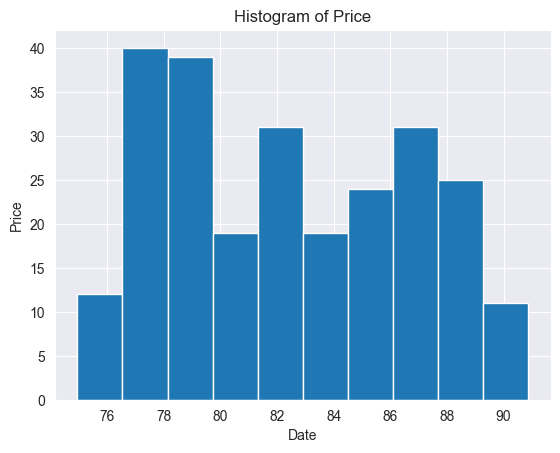

In [140]:
Financials['High'].hist()
plt.xlabel('Date')
plt.ylabel('Price')
plt.title('Histogram of Price')
plt.show()

In [141]:
stats.ttest_rel(Financials['High'], Financials['Close']) 

TtestResult(statistic=17.07535267611234, pvalue=7.437669779704026e-44, df=250)

In [142]:
Financials['High'].corr(Financials['Close'])

0.9900175998361931

In [143]:
Financials.head()

,Date,Open,High,Low,Close,Adj Close,Volume
0,2022-06-02,85.489998,86.900002,85.019997,86.839996,84.711449,1168000
1,2022-06-03,86.019997,86.300003,85.500000,85.610001,83.511597,583600
2,2022-06-06,86.389999,87.120003,85.870003,85.910004,83.804253,365300
3,2022-06-07,85.300003,86.620003,85.209999,86.570000,84.448067,325300
4,2022-06-08,85.820000,86.120003,84.709999,85.059998,82.975090,531400


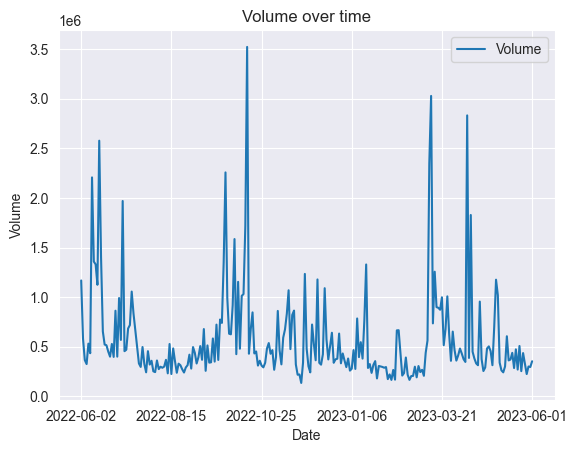

In [144]:
Financials_with_index = Financials.set_index('Date')
Financials['Date'] = pd.to_datetime(Financials['Date'], format='%Y/%m/%d')
Financials_with_index['Volume'].plot()
plt.xlabel('Date')
plt.ylabel('Volume')
plt.title('Volume over time')
plt.legend()
plt.show()

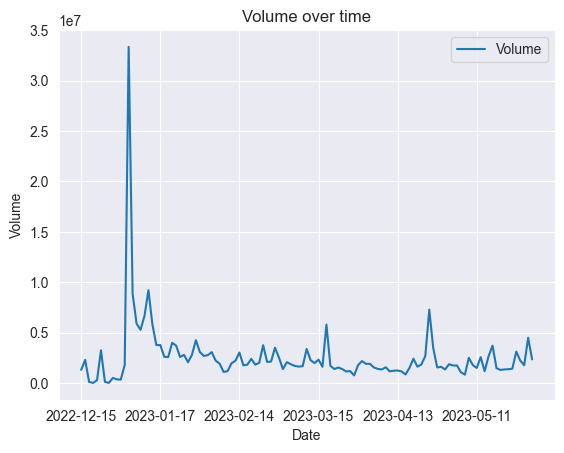

In [145]:
Healthcare_with_index = Healthcare.set_index('Date')
Healthcare['Date'] = pd.to_datetime(Healthcare['Date'], format='%Y/%m/%d')
Healthcare_with_index['Volume'].plot()
plt.xlabel('Date')
plt.ylabel('Volume')
plt.title('Volume over time')
plt.legend()
plt.show()

In [146]:
stats.ttest_rel(Healthcare['High'], Healthcare['Close'])

TtestResult(statistic=9.410913771227305, pvalue=6.559341288932393e-16, df=114)

In [147]:
Healthcare['High'].corr(Healthcare['Close'])

0.9899930948072805

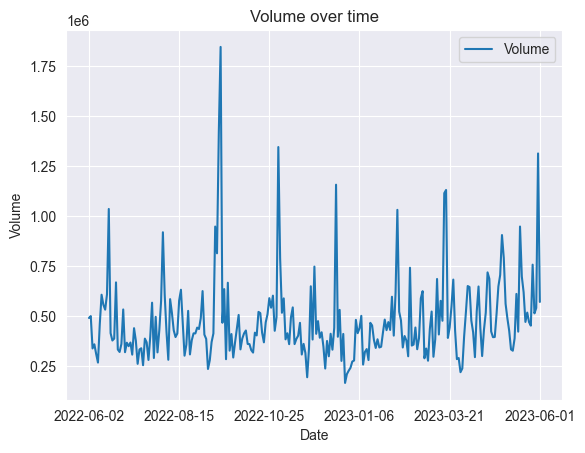

In [148]:
IT_with_index = IT.set_index('Date')
IT['Date'] = pd.to_datetime(IT['Date'], format='%Y/%m/%d')
IT_with_index['Volume'].plot()
plt.xlabel('Date')
plt.ylabel('Volume')
plt.title('Volume over time')
plt.legend()
plt.show()

In [149]:
stats.ttest_rel(IT['High'], IT['Close'])

TtestResult(statistic=17.08955866991423, pvalue=6.647268977534657e-44, df=250)

In [150]:
IT['High'].corr(IT['Close'])

0.9952465376719073

In [ ]:
CD1_with_index = CD1.set_index('Date1')
CD1['Date1'] = pd.to_datetime(CD1['Date1'], format='%Y/%m/%d')
CD1_with_index['Volume'].plot()
plt.xlabel('Date1')
plt.ylabel('Volume')
plt.title('Volume over time')
plt.legend()
plt.show()